<a href="https://colab.research.google.com/github/claudiometelli/dip-algorithms/blob/main/Digital_Image_Processing_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Image Processing - Notes

## Setting up the environment

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [ ]:
import os
from google.colab import drive

drive.mount("/content/drive", force_remount=True)
data_path="/content/drive/My Drive/Colab Notebooks/DIP/data/"

Mounted at /content/drive


In [ ]:
def load_image(nome_img, image_type):
  img = None
  img = cv2.imread(data_path+nome_img, image_type)

  if img is not None:

    global img_height
    global img_width
    global img_channel

    if len(img.shape) == 2:
      img_height = img.shape[0]
      img_width = img.shape[1]
      print(f"Image Type Grayscale: {img.shape}")
      print(f"Height: {img.shape[0]}")
      print(f"Width: {img.shape[1]}")
      image_type=0
    elif len(img.shape) == 3 and img.shape[2]==3:
      img_height = img.shape[0]
      img_width = img.shape[1]
      img_channel = img.shape[2]
      print(f"Image Type Color: {img.shape}")
      print(f"Height: {img.shape[0]}")
      print(f"Width: {img.shape[1]}")
      print(f"Number of Channels: {img.shape[2]}")
      image_type=1

    if image_type==1:
      # converting from BGR to RGB
      # 1° channel: RED
      # 2° channel: GREEN
      # 3° channel: BLUE
      img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img,cmap='gray', interpolation='bicubic', vmin=0, vmax=255)
    plt.xticks([]), plt.yticks([])
    plt.show()
    return img

  else:
    print("Unable to load the image.\nCheck file name!!!")
    return None

def show_image(img):
  if img is not None:
    if len(img.shape) == 2:
      print("image type Grayscale: "+str(img.shape))
      print("height: "+str(img.shape[0]))
      print("width: "+str(img.shape[1]))
      image_type=0
    elif len(img.shape) == 3 and img.shape[2]==3:
      print("image type Color: "+str(img.shape))
      print("height: "+str(img.shape[0]))
      print("width: "+str(img.shape[1]))
      print("number of channels: "+str(img.shape[2]))
      image_type=1

    plt.imshow(img,cmap='gray', interpolation='bicubic', vmin=0, vmax=255)
    plt.xticks([]), plt.yticks([])
    plt.show()

  else:
    print("Unable to load the image to show. Something went wrong.")

Image Type Grayscale: (256, 256)
Height: 256
Width: 256


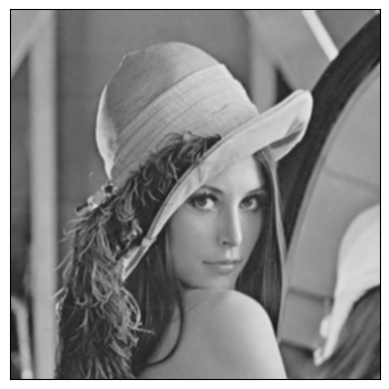

Image Type Color: (256, 256, 3)
Height: 256
Width: 256
Number of Channels: 3


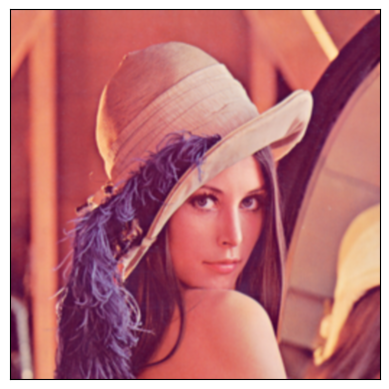

In [ ]:
bw_img = load_image("lena.png", 0)
img = load_image("lena.png", 1)

In [ ]:
def get_img_height(image): return image.shape[0]

def get_img_width(image): return image.shape[1]

def get_img_channels(img): return img.shape[2]

## Basic Processing

### Transposing

In [ ]:
def transpose(image):
    return image.transpose().astype(np.uint32)

image type Grayscale: (256, 256)
height: 256
width: 256


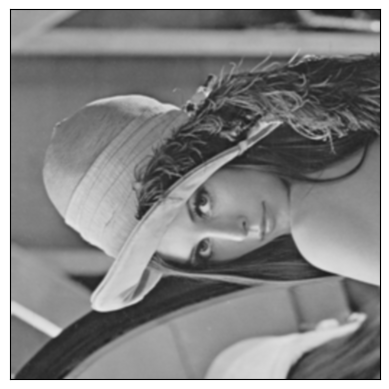

In [ ]:
transposed_img = transpose(bw_img)
show_image(transposed_img)

### Vertical Flipping

In [ ]:
def flip_vertical(image):
    result = np.zeros(image.shape)
    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):
            result[i,j] = image[-i-1,j]
    return result

image type Grayscale: (256, 256)
height: 256
width: 256


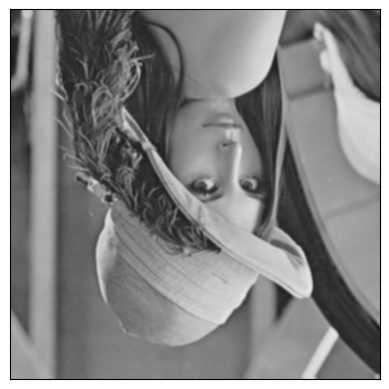

In [ ]:
vertical_flipped_img = flip_vertical(bw_img)
show_image(vertical_flipped_img)

### Horizontal Flipping

In [ ]:
def flip_horizontal(image):
    result = np.zeros(image.shape)
    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):
            result[i,j] = image[i,-j-1]
    return result

image type Grayscale: (256, 256)
height: 256
width: 256


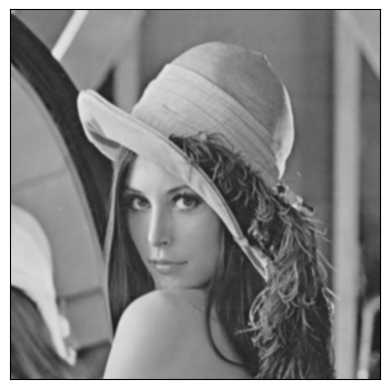

In [ ]:
horizontal_flipped_img = flip_horizontal(bw_img)
show_image(horizontal_flipped_img)

### Cropping

In [ ]:
def crop_image(image, starting_x, starting_y, height, width):
    return image[starting_x:starting_x+height, starting_y:starting_y+width]

image type Grayscale: (32, 64)
height: 32
width: 64


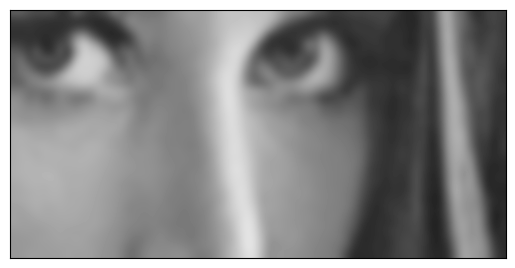

In [ ]:
cropped_img = crop_image(bw_img, 128, 128, 32, 64)
show_image(cropped_img)

### Digital Negative

In [ ]:
def digital_negative(image):
    return 255 - image

image type Grayscale: (256, 256)
height: 256
width: 256


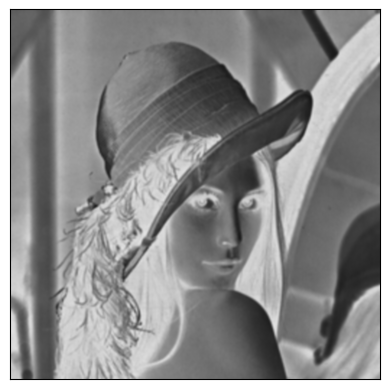

In [ ]:
digital_negative_img = digital_negative(bw_img)
show_image(digital_negative_img)

### Contrast Sensitivity Function

In [ ]:
def contrast_sensitivity_function():
    height_img_csf=800
    width_img_csf=800

    x = np.linspace(0, 5, width_img_csf, endpoint=True)
    y = np.linspace(0, 1, height_img_csf, endpoint=True)

    img_csf = np.zeros((height_img_csf, width_img_csf), dtype=img.dtype)

    for row in range(height_img_csf):
        for column in range(width_img_csf):
            img_csf[row, column] = 128 * (1 + math.sin(math.exp(x[column])) * (y[row] ** 3))

    return img_csf

image type Grayscale: (800, 800)
height: 800
width: 800


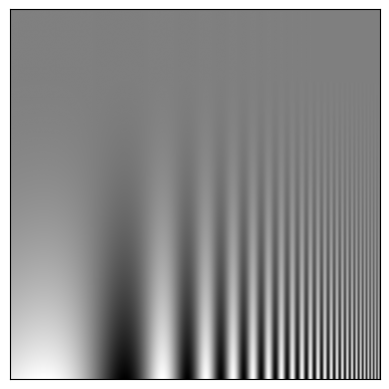

In [ ]:
constrast_sensitivity = contrast_sensitivity_function()
show_image(constrast_sensitivity)

## Histogram Equalization


Histogram equalization is the probability distribution of the pixel values inside an image, in particular:

$h_k=\frac{f_k}{M \times N}$
$\text{with } k \in \{0,.., L-1\}$

Assuming a grayscale image, $L$ is the range of values a pixel can take, usually 256, $f_k$ is the frequency with which the pixel value $k$ appears, and $M \times N$ is the size of the image.

In [ ]:
def histogram_equalization(image):
    result = np.zeros(256)
    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):
            result[image[i,j]] += 1
    result = result / (get_img_height(image) * get_img_width(image))
    return result

In [ ]:
def plot_histogram(hist):
  plt.bar(range(0, len(hist)), hist)
  plt.title("Histogram")
  plt.xlabel("Intensity level")
  plt.ylabel("Intensity frequency")
  plt.show()

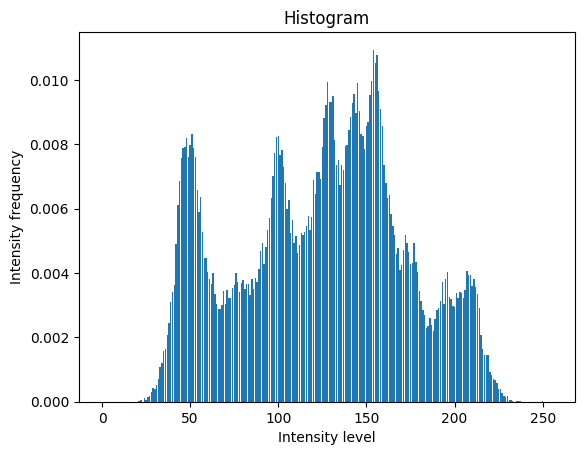

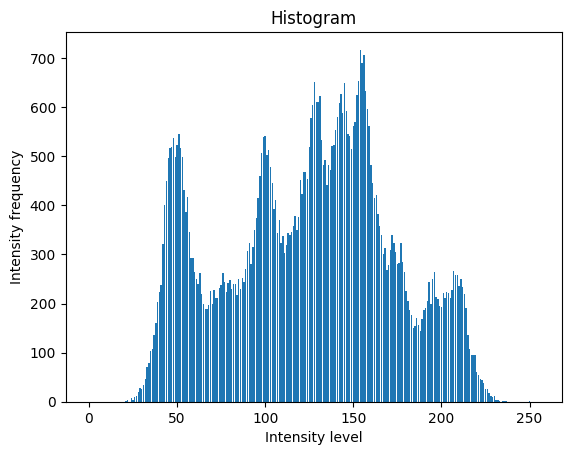

In [ ]:
hist = histogram_equalization(bw_img)
# probability distribution
plot_histogram(hist)
# pixel value distribution
plot_histogram(hist * (get_img_height(bw_img) * get_img_width(bw_img)))

### Testing with low contrast images

Low constrast:

Image Type Grayscale: (500, 500)
Height: 500
Width: 500


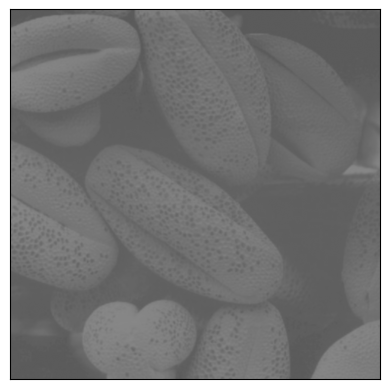

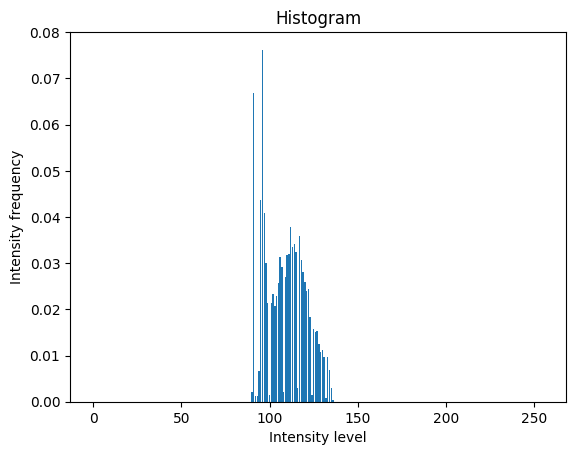

In [ ]:
low_contrast_img = load_image("low_contrast.jpg", 0)
low_contrast_hist = histogram_equalization(low_contrast_img)
plot_histogram(low_contrast_hist)

### Cumulative distribution

In [ ]:
def cumulative_distribution(image):
    hist = histogram_equalization(image)
    result = np.zeros(hist.shape)
    for i in range(len(result)):
        result[i] = np.sum(hist[:i])
    return result

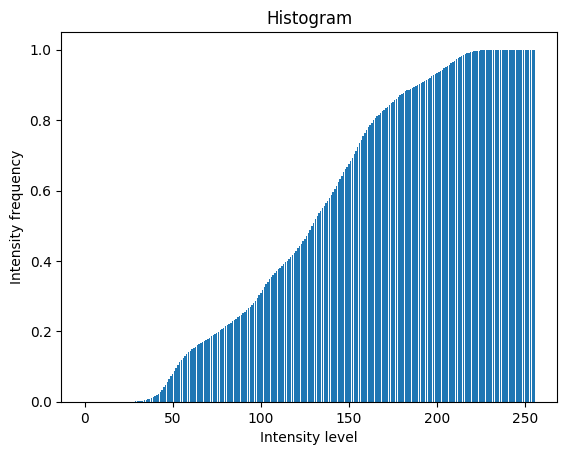

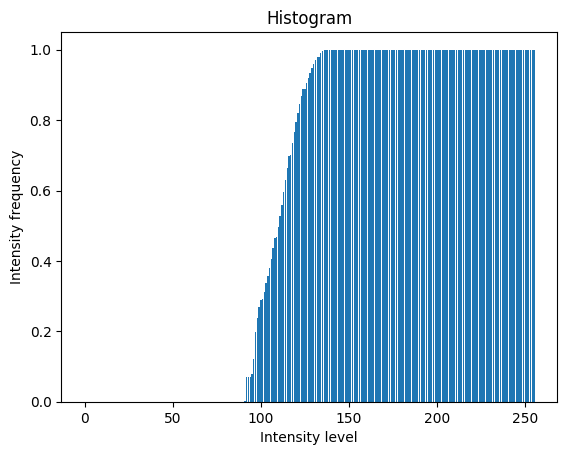

In [ ]:
cum_dist_lena = cumulative_distribution(bw_img)
cum_dist_low_contrast = cumulative_distribution(low_contrast_img)
plot_histogram(cum_dist_lena)
plot_histogram(cum_dist_low_contrast)

### Now enhance the contrast

To do this we apply the following formula:

$I_{eq}(i,j) = F(I(i,j))$

with $F(k)$ cumulative distribution of the image.

In [ ]:
def enhance_contrast(image):
    cum = cumulative_distribution(image)
    result = np.zeros(image.shape)
    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):
            result[i,j] = cum[image[i,j]]
    return 256 * result

image type Grayscale: (500, 500)
height: 500
width: 500


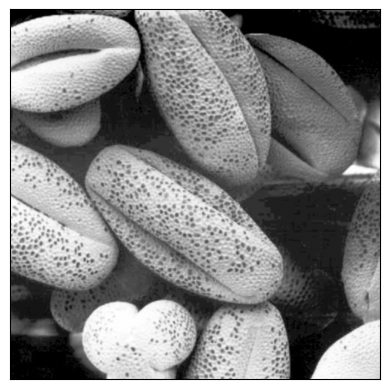

In [ ]:
enhanced_low_contrast_img = enhance_contrast(low_contrast_img)
show_image(enhanced_low_contrast_img)

## Filtering

### Grey Scale Convolution

We define some filters using convolution.

image type Grayscale: (258, 258)
height: 258
width: 258


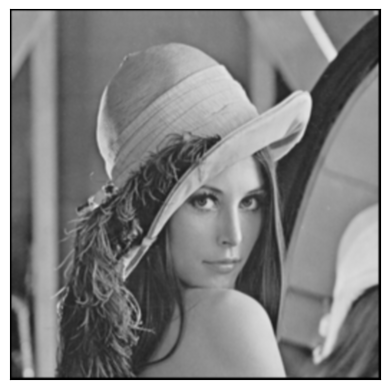

image type Grayscale: (258, 258)
height: 258
width: 258


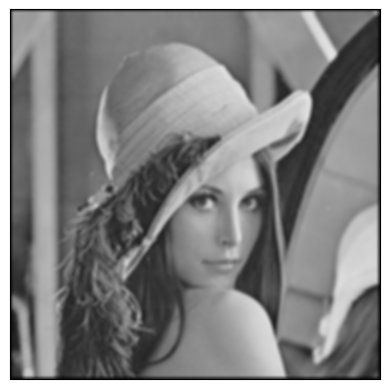

In [ ]:
def bw_convolution(image, kernel):
    img = np.zeros((get_img_height(image) + kernel.shape[0] - 1, get_img_width(image) + kernel.shape[1] - 1))

    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):

            for k_i in range(kernel.shape[0]):
                for k_j in range(kernel.shape[1]):

                    img[i+k_i,j+k_j] += kernel[k_i, k_j] * image[i,j]
    return img

identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
mean_kernel = (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
show_image(bw_convolution(bw_img, identity_kernel))
show_image(bw_convolution(bw_img, mean_kernel))

Let's define convolution using RGB images.

In [ ]:
def rgb_convolution(image, kernel):
    img = np.zeros((get_img_height(image) + kernel.shape[0] - 1, get_img_width(image) + kernel.shape[1] - 1, get_img_channels(image)))
    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):
            for k in range(get_img_channels(image)):

                for k_i in range(kernel.shape[0]):
                    for k_j in range(kernel.shape[1]):

                        img[i+k_i,j+k_j,k] += kernel[k_i, k_j] * image[i,j,k]

    return img.astype(int)

### Identity Filter

image type Color: (256, 256, 3)
height: 256
width: 256
number of channels: 3


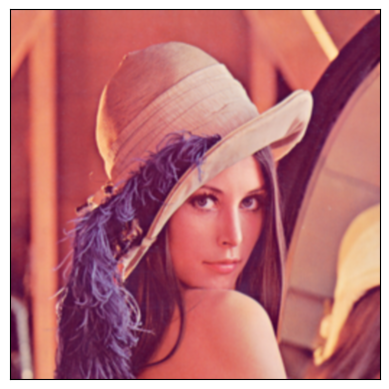

image type Color: (258, 258, 3)
height: 258
width: 258
number of channels: 3


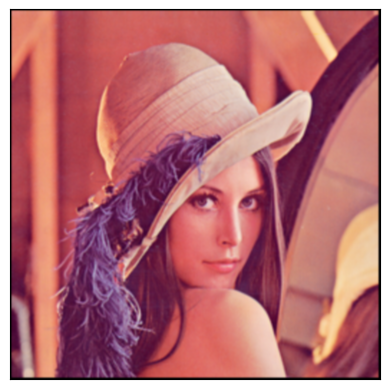

In [ ]:
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
identity_img = rgb_convolution(img, identity_kernel)
show_image(img)
show_image(identity_img)

### Low Pass Filter

image type Color: (256, 256, 3)
height: 256
width: 256
number of channels: 3


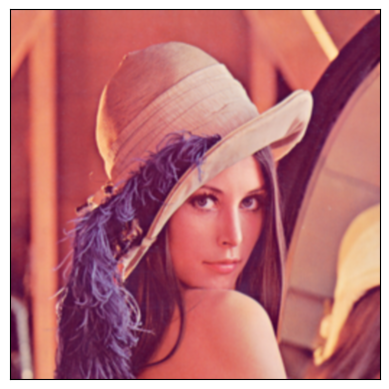

image type Color: (258, 258, 3)
height: 258
width: 258
number of channels: 3


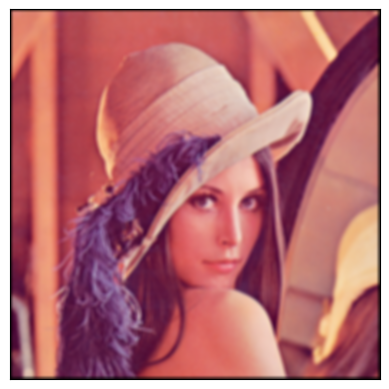

In [ ]:
low_pass__kernel = (1/9) * np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
low_pass_img = rgb_convolution(img, low_pass__kernel)
show_image(img)
show_image(low_pass_img)

### High Pass Filter

image type Color: (256, 256, 3)
height: 256
width: 256
number of channels: 3


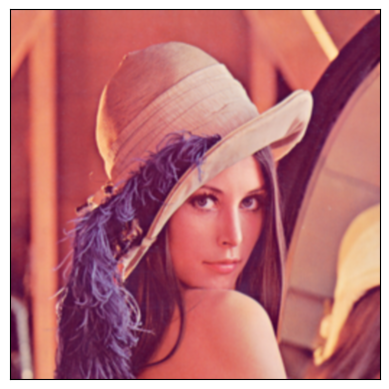

image type Color: (258, 258, 3)
height: 258
width: 258
number of channels: 3


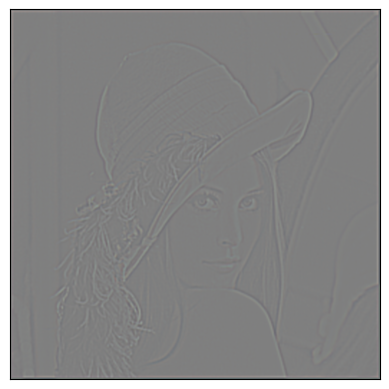

In [ ]:
high_pass_img = np.clip(127.5 + (identity_img.astype(float) - low_pass_img.astype(float)) / 2.0, 0, 255).astype(np.uint32)
show_image(img)
show_image(high_pass_img)

### Sharpening Filter

image type Color: (256, 256, 3)
height: 256
width: 256
number of channels: 3


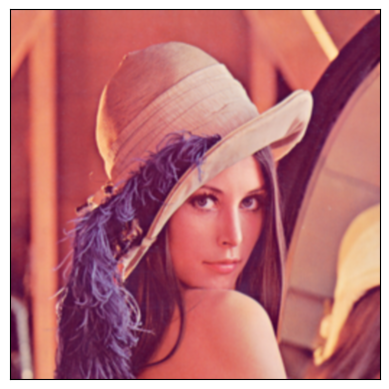

image type Color: (258, 258, 3)
height: 258
width: 258
number of channels: 3


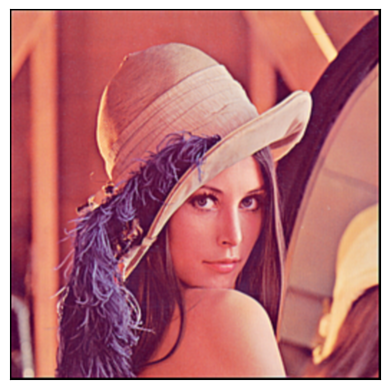

In [ ]:
sharpening_kernel = (1/9) * np.array([[-1, -1, -1], [-1, 17, -1], [-1, -1, -1]])
sharpening_img = np.clip(rgb_convolution(img, sharpening_kernel), 0, 255)
show_image(img)
show_image(sharpening_img)

### Frequency Filtering

In [ ]:
def freq_bw_convolution(image, kernel):
    img_padded = np.zeros((get_img_height(image) + kernel.shape[0] - 1, get_img_width(image) + kernel.shape[1] - 1))
    img_padded[:get_img_height(image), :get_img_width(image)] = image
    kernel_padded = np.zeros((get_img_height(image) + kernel.shape[0] - 1, get_img_width(image) + kernel.shape[1] - 1))
    kernel_padded[:kernel.shape[0], :kernel.shape[1]] = kernel
    f_img = np.fft.fft2(img_padded)
    f_kernel = np.fft.fft2(kernel_padded)
    f_out = f_img * f_kernel
    out = np.fft.ifft2(f_out)
    rk_2 = int(math.floor(kernel.shape[0]/2))
    ck_2 = int(math.floor(kernel.shape[1]/2))
    out = out[rk_2:-rk_2, ck_2:-ck_2]
    return np.real(out).astype(int)

image type Grayscale: (256, 256)
height: 256
width: 256


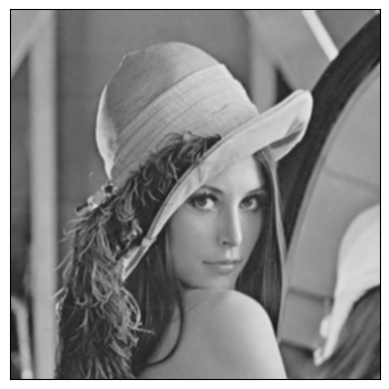

image type Grayscale: (256, 256)
height: 256
width: 256


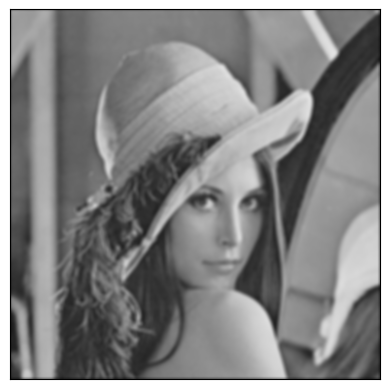

In [ ]:
freq_bw_img = freq_bw_convolution(bw_img, mean_kernel)
show_image(bw_img)
show_image(freq_bw_img)

In [ ]:
def freq_bw_convolution_shifted(image, kernel):
    image = image.astype(float)
    img_shifted = np.zeros(image.shape)
    for i in range(img_shifted.shape[0]):
        for j in range(img_shifted.shape[1]):
            img_shifted[i, j] = image[i, j] * ((-1) ** (i + j))

    img_padded = np.zeros((get_img_height(image) + kernel.shape[0] - 1, get_img_width(image) + kernel.shape[1] - 1))
    img_padded[:get_img_height(image), :get_img_width(image)] = img_shifted
    kernel_padded = np.zeros((get_img_height(image) + kernel.shape[0] - 1, get_img_width(image) + kernel.shape[1] - 1))
    kernel_padded[:kernel.shape[0], :kernel.shape[1]] = kernel

    f_img = np.fft.fft2(img_padded)
    f_kernel = np.fft.fft2(kernel_padded)
    f_out = f_img * f_kernel
    out = np.fft.ifft2(f_out)

    rk_2 = int(math.floor(kernel.shape[0]/2))
    ck_2 = int(math.floor(kernel.shape[1]/2))
    out = out[rk_2:-rk_2, ck_2:-ck_2]

    img_output = np.zeros(out.shape)
    for i in range(img_shifted.shape[0]):
        for j in range(img_shifted.shape[1]):
            img_output[i, j] = out[i, j] * ((-1) ** (i + j))

    img_output = np.real(img_output)
    img_output = img_output - np.min(img_output)
    img_output = img_output / np.max(img_output) * 255
    return img_output.astype(np.uint8)

/tmp/ipython-input-136-3397165190.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  img_output[i, j] = out[i, j] * ((-1) ** (i + j))


image type Grayscale: (256, 256)
height: 256
width: 256


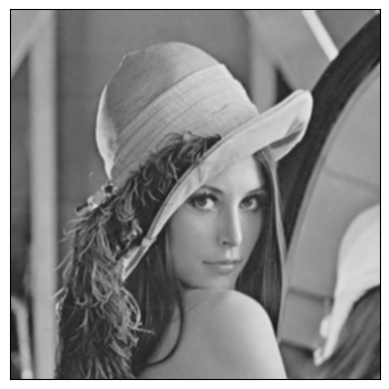

image type Grayscale: (256, 256)
height: 256
width: 256


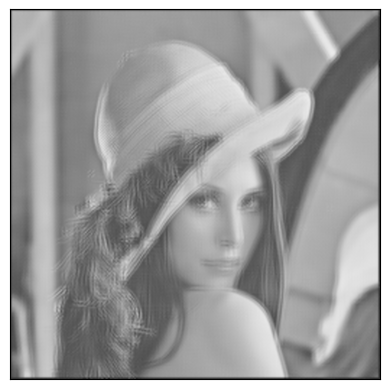

In [ ]:
freq_bw_img = freq_bw_convolution_shifted(bw_img, mean_kernel)
show_image(bw_img)
show_image(freq_bw_img)

## Canny's Edge Detection

Applying Gaussian Kernel

In [ ]:
def gaussian_mask(image):
    return cv2.GaussianBlur(image, (5,5), 0)

In [ ]:
def apply_gradient(image):
    h_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    v_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    h_conv = bw_convolution(image, h_kernel)[1:-1,1:-1]
    v_conv = bw_convolution(image, v_kernel)[1:-1,1:-1]
    gradient_filtered_img = np.sqrt(np.multiply(h_conv, h_conv) + np.multiply(v_conv, v_conv))
    return h_conv, v_conv, gradient_filtered_img

In [ ]:
def non_maximum_suppression(h_grad, v_grad, gradient_image):

    result = np.zeros((gradient_image.shape[0] + 2, gradient_image.shape[1] + 2))

    # adding 0-pad to image
    img = np.zeros((gradient_image.shape[0] + 2, gradient_image.shape[1] + 2))
    img[1:-1,1:-1] = gradient_image.copy()

    #finding gradient direction, rounding and padding
    direction_img = np.rad2deg(np.arctan2(v_grad, h_grad)) + 180
    rounded_direction_img = (np.round(direction_img/45)*45).astype(np.uint16)
    dir_img = np.zeros((gradient_image.shape[0] + 2, gradient_image.shape[1] + 2))
    dir_img[1:-1,1:-1] = rounded_direction_img

    for i in range(1, dir_img.shape[0] - 1):
        for j in range(1, dir_img.shape[1] - 1):
            triad = [(0, 0), img[i,j], (0, 0)]

            if dir_img[i,j] >= 180.:
                dir_img[i,j] -= 180.
            if dir_img[i,j] == 0.:
                triad[0] = (0, -1)
                triad[2] = (0, 1)
            elif dir_img[i,j] == 45.:
                triad[0] = (1, -1)
                triad[2] = (-1, 1)
            elif dir_img[i,j] == 90.:
                triad[0] = (1, 0)
                triad[2] = (-1, 0)
            elif dir_img[i,j] == 135.:
                triad[0] = (1, 1)
                triad[2] = (-1, -1)
            elif dir_img[i,j] == 180.:
                triad[0] = (0, 1)
                triad[2] = (0, -1)

            triad[0] = img[i+triad[0][0],j+triad[0][1]]
            triad[2] = img[i+triad[2][0],j+triad[2][1]]

            if triad[1] >= triad[0] and triad[1] >= triad[2]:
                result[i,j] = img[i,j]

    return result.astype(np.uint16)[1:-1,1:-1]

In [ ]:
def double_threshold_hysteresis(edged_img):

    result = np.zeros((edged_img.shape[0] + 4, edged_img.shape[1] + 4))
    result[2:-2,2:-2] = edged_img.copy()

    low_threshold = 60
    high_threshold = 150

    edged_img = result.copy()

    for i in range(2, result.shape[0]):
        for j in range(2, result.shape[1]):

            if edged_img[i,j] < low_threshold:
                result[i,j] = 0.0
            elif edged_img[i,j] < high_threshold and not np.any(edged_img[i-2:i+3,j-2:j+3]) > high_threshold:
                result[i,j] = 0.0
    result[result>0] = 255
    return result[2:-2,2:-2].astype(np.uint16)

Starting Image
image type Grayscale: (256, 256)
height: 256
width: 256


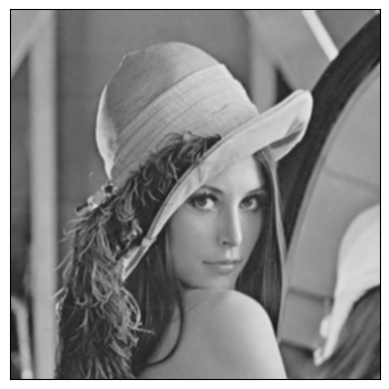

Applying Gaussian Filter
image type Grayscale: (256, 256)
height: 256
width: 256


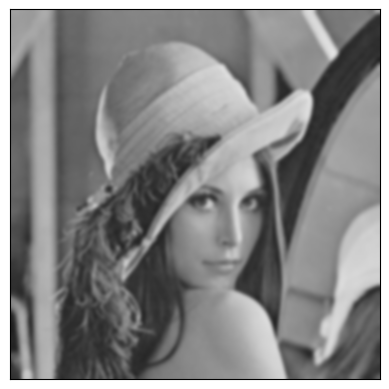

Applying Gradient Filter
image type Grayscale: (256, 256)
height: 256
width: 256


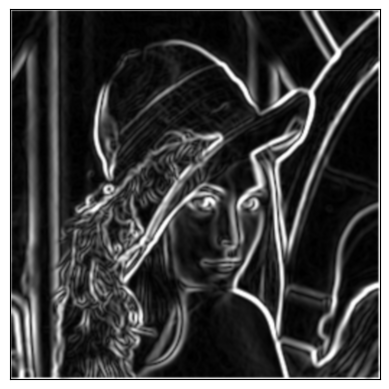

Applying Non Maximum Suppression
image type Grayscale: (256, 256)
height: 256
width: 256


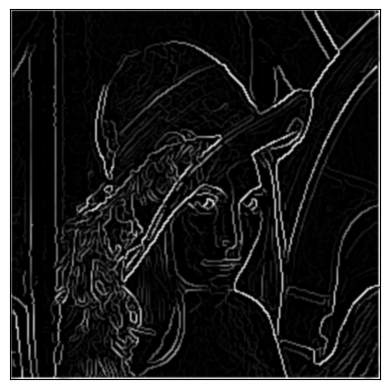

Applying Thresholding
image type Grayscale: (256, 256)
height: 256
width: 256


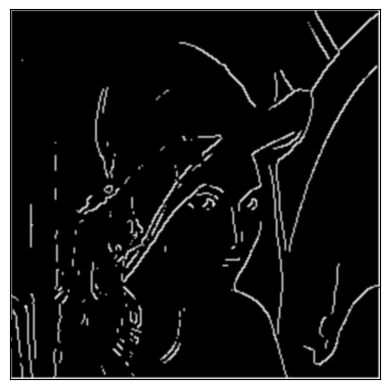

In [ ]:
print("Starting Image")
show_image(bw_img)
gaussian_filtered_img = gaussian_mask(bw_img)
print("Applying Gaussian Filter")
show_image(gaussian_filtered_img)
h_gradient_img, v_gradient_img, gradient_filtered_img = apply_gradient(gaussian_filtered_img)
print("Applying Gradient Filter")
show_image(gradient_filtered_img)
grad_edge_img = non_maximum_suppression(h_gradient_img, v_gradient_img, gradient_filtered_img)
print("Applying Non Maximum Suppression")
show_image(grad_edge_img)
edged_img = double_threshold_hysteresis(grad_edge_img)
print("Applying Thresholding")
show_image(edged_img)

## Hough Transformation

In [ ]:
def hough_transform(image, threshold=100):
    edges = cv2.Canny(image, 60, 150)

    img_diag = (np.ceil(np.sqrt(get_img_height(image) ** 2 + get_img_width(image) ** 2))).astype(int)
    hough_space_object = np.empty((181, 2 * img_diag), dtype=object)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if edges[x, y] == 255:
                for theta in range(hough_space_object.shape[0]):
                    norm_theta = np.deg2rad(theta - 90)
                    rho = (np.floor(x * np.cos(norm_theta) + y * np.sin(norm_theta))).astype(int)
                    if hough_space_object[theta, rho] is None:
                        hough_space_object[theta, rho] = (0, [])
                    counter = hough_space_object[theta, rho][0] + 1
                    hough_space_object[theta, rho][1].append((x, y))
                    points = hough_space_object[theta, rho][1]
                    hough_space_object[theta, rho] = (counter, points)

    result = np.zeros((img_height, img_width, 3), np.uint8)
    for theta in range(hough_space_object.shape[0]):
        for rho in range(hough_space_object.shape[1]):
            if((hough_space_object[theta][rho]!=None) and (hough_space_object[theta][rho][0]>threshold)):
                array_punti = np.asarray(hough_space_object[theta][rho][1])
                cv2.polylines(result,[array_punti],False,(0,255,255))

    return result

Image Type Grayscale: (197, 190)
Height: 197
Width: 190


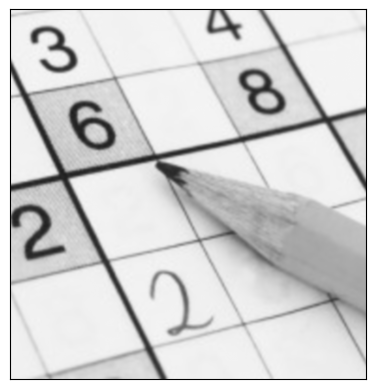

image type Color: (197, 190, 3)
height: 197
width: 190
number of channels: 3


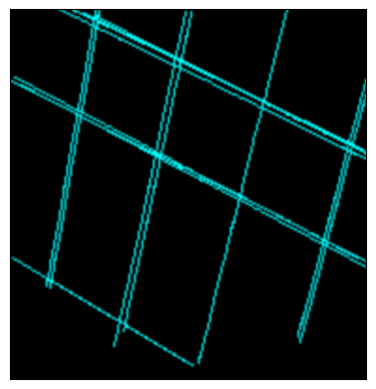

In [ ]:
bw_sudoku_img = load_image("sudoku.png", 0)
highlighted_lines_img = hough_transform(bw_sudoku_img)
show_image(highlighted_lines_img)

## Image Segmentation

Otsu Thresholding

In [ ]:
def otsu_thresholding(image, thresholds):
    result = np.zeros(image.shape)
    variances = []
    for t in thresholds:
        foreground = []
        background = []
        for i in range(get_img_height(image)):
            for j in range(get_img_width(image)):
                if image[i,j] >= t:
                    background.append(image[i,j])
                else:
                    foreground.append(image[i,j])
        f_len = len(foreground)
        b_len = len(background)
        foreground = np.array(foreground)
        background = np.array(background)
        variances.append(f_len * np.var(foreground) + b_len * np.var(background))
    final_threshold = thresholds[variances.index(min(variances))]

    for i in range(get_img_height(image)):
        for j in range(get_img_width(image)):
            if image[i,j] >= final_threshold:
                result[i,j] = 255
            else:
                result[i,j] = 0
    print(f"Chosen Threshold: {final_threshold}")
    return result.astype(np.uint32)


In [ ]:
def otsu_thresholding_with_histogram(image, thresholds, debug=False):
    hist = histogram_equalization(image)
    variances = []
    for t in thresholds:
        background_ratio = np.sum(hist[:t])
        foreground_ratio = np.sum(hist[t:])
        background_mean = np.sum([i * hist[i] for i in range(t)]) / background_ratio
        foreground_mean = np.sum([i * hist[i] for i in range(t, 256)]) / foreground_ratio
        background_variance = np.sum([((i-background_mean)**2)*hist[i] for i in range(t)]) / background_ratio
        foreground_variance = np.sum([((i-foreground_mean)**2)*hist[i] for i in range(t, 256)]) / foreground_ratio
        variances.append(background_ratio * background_variance + foreground_ratio * foreground_variance)
        if debug:
            print(f">>> Threshold: {t}")
            print(f"Background: ratio {background_ratio:.3f}, mean {background_mean:.3f}, variance: {background_variance:.3f}") #, variance: {background_variance*background_ratio:.3f}")
            print(f"Foreground: ratio {foreground_ratio:.3f}, mean {foreground_mean:.3f}, variance: {foreground_variance:.3f}") #, variance: {foreground_variance*foreground_ratio:.3f}")
            print(f"Variance: {variances[-1]}")

    min_threshold = thresholds[variances.index(min(variances))]
    print(f"Chosen Threshold: {min_threshold}")
    result = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] >= min_threshold:
                result[i, j] = 255
            else:
                result[i, j] = 0
    return result

Image Type Grayscale: (768, 1024)
Height: 768
Width: 1024


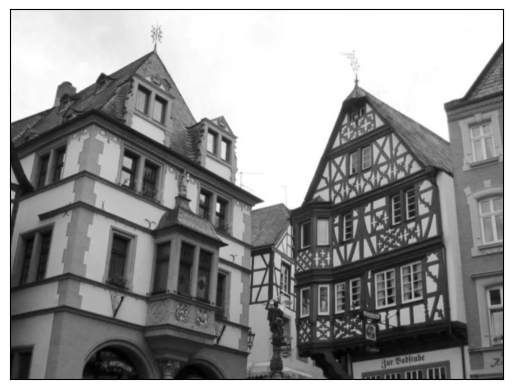

Chosen Threshold: 140
Chosen Threshold: 140
image type Grayscale: (768, 1024)
height: 768
width: 1024


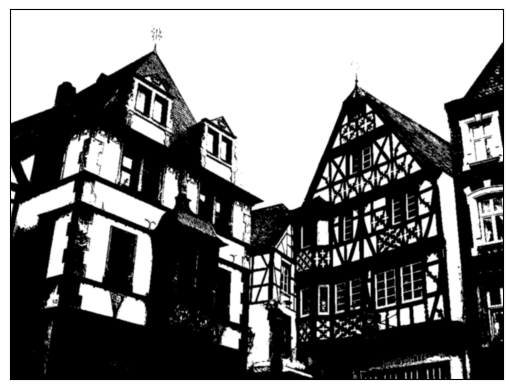

image type Grayscale: (768, 1024)
height: 768
width: 1024


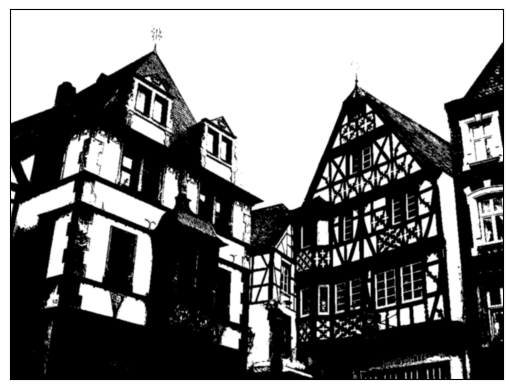

In [ ]:
bw_house_img = load_image("otsu_thresholding.jpeg", 0)
thresholds = [50, 80, 11, 140, 170, 200]
otsu_img = otsu_thresholding(bw_house_img, thresholds)
otsu_img_with_histogram = otsu_thresholding_with_histogram(bw_house_img, thresholds)
show_image(otsu_img)
show_image(otsu_img_with_histogram)

## Vector Quantization

### LLoyd - Max Algorithm


#### Useful operations


In [ ]:
def get_centroids(intervals, hist):
    centroids = np.zeros(len(intervals) - 1).astype(np.uint32)
    for start, end in zip(intervals[:-1], intervals[1:]):
        tot_val = 0.0
        tot_freq = 0.0
        for pixel_val in range(start, end):
            freq = hist[pixel_val]
            tot_freq += freq
            tot_val += freq * pixel_val
        centroid = int(np.round(tot_val / tot_freq)) if  tot_freq != 0.0 else int(np.round(start + end)) / 2
        centroids[np.where(intervals == start)[0]] = centroid
    return centroids

def get_intervals(centroids):
    intervals = np.zeros(len(centroids) + 1)
    intervals[0] = 0
    intervals[-1] = 256
    for i in range(1, len(intervals)-1):
        intervals[i] = int(np.round((centroids[i-1] + centroids[i]) / 2))
    return intervals.astype(np.uint32)

def mean_square_error(intervals, centroids, hist):
    error = 0.0
    for start, end in zip(intervals[:-1], intervals[1:]):
        centroid_index = np.where(intervals == start)[0]
        for pixel_val in range(start, end):
            error += ((pixel_val - centroids[centroid_index]) ** 2) * hist[pixel_val]
    return error

#### LLoyd - Max Function

In [ ]:
def lloyd_max(image, p):
    result = np.zeros(image.shape)

    hist = histogram_equalization(image)
    intervals = np.random.randint(256, size=p+1).astype(np.uint32)
    intervals[0] = 0
    intervals[-1] = 256
    centroids = get_centroids(intervals, hist)
    errors = [np.inf, mean_square_error(intervals, centroids, hist)]
    t = 1

    while errors[t] < errors[t-1]:
        intervals = get_intervals(centroids)
        centroids = get_centroids(intervals, hist)
        errors.append(mean_square_error(intervals, centroids, hist))
        t += 1

    # print(intervals, centroids, t, errors[-1], sep="\n")

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(len(centroids)):
                if intervals[k] <= image[i, j] < intervals[k + 1]:
                    result[i, j] = centroids[k]

    return result

image type Grayscale: (256, 256)
height: 256
width: 256


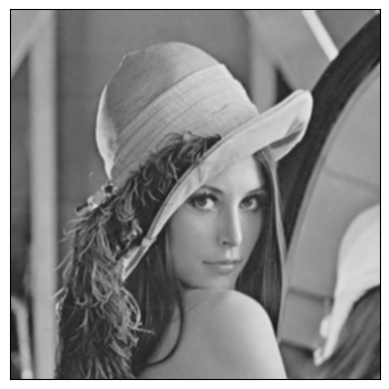

image type Grayscale: (256, 256)
height: 256
width: 256


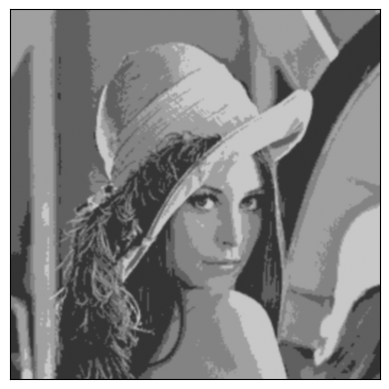

In [ ]:
lloyd_max_img = lloyd_max(bw_img, 5)
show_image(bw_img)
show_image(lloyd_max_img)

### Linde - Buzo - Gray Algorithm

Useful operations

In [ ]:
def mean_square_error(quant_image, image):
    return np.mean(np.square(quant_image - image))

def get_quantized_image(image, centroids):
    quant_image = np.zeros(image.shape)
    if len(centroids) == 1:
        quant_image[:,:,:] = centroids[0]
    else:
        distances = np.sqrt(np.sum((image[:,:,None,:] - centroids[None,None,:,:])**2, axis=3))
        min_distances = np.argmin(distances, axis=2)
        quant_image = centroids[min_distances]
    return quant_image.astype(np.uint32)

def split_centroids(centroids, epsilon=np.array([30.0, 30.0, 30.0])):
    result = np.zeros((centroids.shape[0]*2, centroids.shape[1]))
    for i in range(len(centroids)):
        result[i*2] = np.clip(centroids[i] - epsilon, 0, 255)
        result[i*2+1] = np.clip(centroids[i] + epsilon, 0, 255)
    return result

def update_centroids(image, quant_image, centroids):
    result = np.zeros(centroids.shape)
    for i in range(len(centroids)):
        pixels = np.equal(quant_image, centroids[i])
        tot_pixels = np.count_nonzero(pixels) / pixels.shape[2]
        # print(f"Pixels Shape:{pixels.shape}, {tot_pixels}")
        if tot_pixels > 0:
            result[i] = np.sum(image, axis=(0,1), where=pixels) / tot_pixels
        else:
            result[i] = centroids[i]

    return np.round(result).astype(np.uint32)



#### Algorithm

In [ ]:
def linde_buzo_gray(image, quant_level, debug=False):

    centroids = np.array([np.array(np.mean(image, axis=(0, 1)).astype(np.uint32))])
    quantized_image = get_quantized_image(image, centroids)
    errors = [np.inf, mean_square_error(quantized_image, quantized_image)]
    if debug: print(f"-> Starting Centroid: {centroids[0]}")
    l = 0

    while 2 ** l < quant_level:
        if debug: print(f"-> External Cycle {l}:")
        centroids = split_centroids(centroids)
        t = 1
        if debug: print(f"- Splitting Centroids:\n{centroids}")

        while errors[t] < errors[t-1]:

            quantized_image = get_quantized_image(image, centroids)
            centroids = update_centroids(image, quantized_image, centroids)
            if debug: print(f"Updated Centroids for Internal Cycle {t}:\n", centroids)
            errors.append(mean_square_error(quantized_image, image))
            t += 1

        l += 1
        errors = [np.inf, errors[-1]]

    quantized_image = get_quantized_image(image, centroids)
    return quantized_image

image type Color: (256, 256, 3)
height: 256
width: 256
number of channels: 3


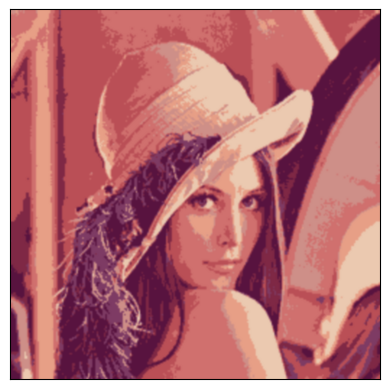

In [ ]:
lbg_img = linde_buzo_gray(img, 8)
show_image(lbg_img)

## Linear and Spatial Transformations

### Bilinear Interpolation

In [ ]:
from math import floor

def bilinear_interpolation(pixel_coordinate, image):
    x = pixel_coordinate[0]
    y = pixel_coordinate[1]

    fx = floor(x)
    cx = floor(x)+1
    fy = floor(y)
    cy = floor(y)+1

    if(cx >= 512 or cy>= 512): print(pixel_coordinate)
    r1 = (x-fx)*image[cx,cy] + (cx-x)*image[fx,cy]
    r2 = (x-fx)*image[cx,fy] + (cx-x)*image[fx,fy]
    r = r1*(y-fy) + r2*(cy-y)

    return r

### Scaling

In [ ]:
def scaling(image, s_x, s_y):
    padded_image = np.zeros((image.shape[0] + 1, image.shape[1] + 1))
    padded_image[:image.shape[0], :image.shape[1]] = image
    result = np.zeros(np.array([image.shape[0] * s_x, image.shape[1] * s_y]).astype(int))
    scaling_matrix = np.array([[1.0/s_x, 0], [0, 1.0/s_y]])
    for i in range(result.shape[0] - 1):
        for j in range(result.shape[1] - 1):
            x, y = np.dot(scaling_matrix, np.array([i, j]))
            result[i, j] = bilinear_interpolation((x,y), padded_image)
    return result

image type Grayscale: (256, 256)
height: 256
width: 256


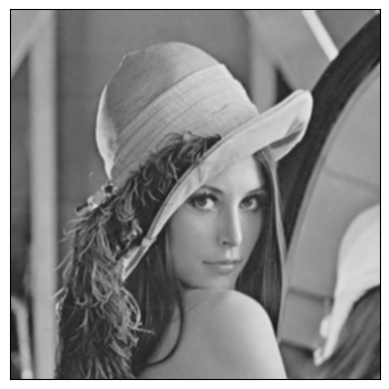

image type Grayscale: (512, 512)
height: 512
width: 512


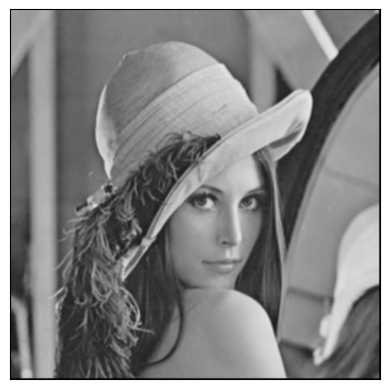

In [ ]:
scaled_img = scaling(bw_img, 2, 2)
show_image(bw_img)
show_image(scaled_img)

### Rotating

In [ ]:
def mat2euc(image):
    result = np.zeros((image.shape[0]*2, image.shape[1]*2))
    x_offset = result.shape[0] // 2 - image.shape[0] // 2
    y_offset = result.shape[1] // 2 - image.shape[1] // 2
    result[x_offset:x_offset+image.shape[0], y_offset:y_offset+image.shape[1]] = image
    return result, x_offset, y_offset

def rotation(image, theta):
    padded_image, x_offset, y_offset = mat2euc(image)
    h, w = padded_image.shape
    result = np.zeros_like(padded_image)
    cx, cy = h // 2, w // 2

    theta = np.deg2rad(theta)
    rot_mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    for i in range(h):
        for j in range(w):
            x_rel = i - cx
            y_rel = j - cy

            x_rot, y_rot = np.dot(rot_mat, np.array([x_rel, y_rel]))
            x_src = x_rot + cx
            y_src = y_rot + cy

            if 0 <= x_src < h-1 and 0 <= y_src < w-1:
                result[i, j] = bilinear_interpolation((x_src, y_src), padded_image)
    return result

image type Grayscale: (512, 512)
height: 512
width: 512


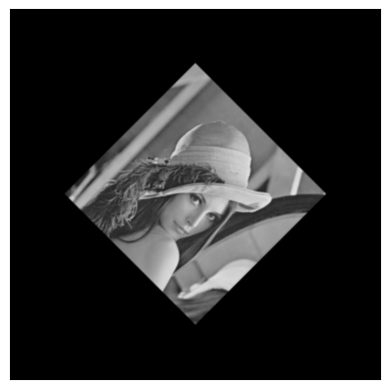

In [ ]:
rot_image = rotation(bw_img, 45)
show_image(rot_image)

## Morphological Transformations

### Erosion

In [ ]:
def erosion(image, kernel):
    result = np.zeros(image.shape)
    img = np.zeros((image.shape[0]+2, image.shape[1]+2))
    img[1:-1,1:-1] = image
    ones = np.count_nonzero(kernel)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i,j] == 255:
                counter = 0
                for k_1 in range(i-1, i+2):
                    for k_2 in range(j-1, j+2):
                        if img[k_1,k_2] == 255 and kernel[k_1-i+1,k_2-j+1] == 255:
                            counter += 1
                if counter == ones:
                    result[i-1,j-1] = 255
    return result.astype(np.uint32)

Image Type Grayscale: (256, 256)
Height: 256
Width: 256


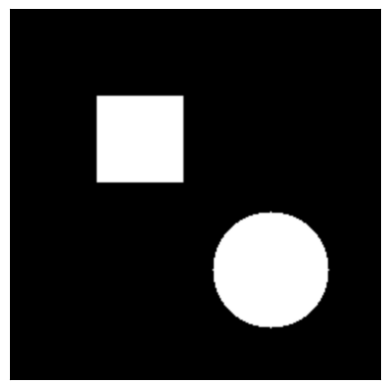

image type Grayscale: (256, 256)
height: 256
width: 256


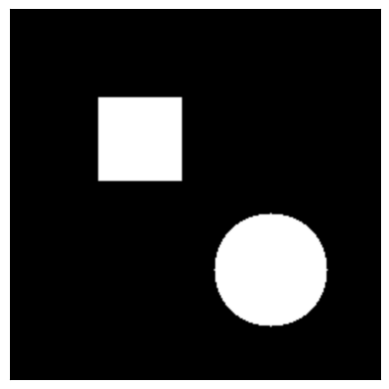

image type Grayscale: (256, 256)
height: 256
width: 256


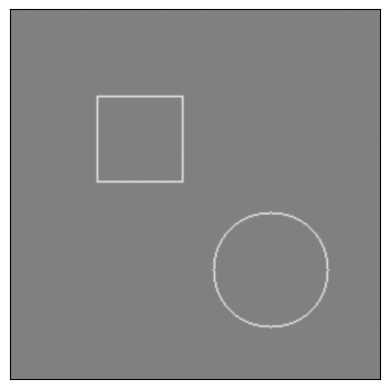

In [ ]:
binary_img = load_image("binary_image.png", 0)
erosion_kernel = np.array([[0, 255, 0], [255, 0, 255], [0, 255, 0]])
erosion_img = erosion(binary_img, erosion_kernel)
show_image(erosion_img)
erosion_diff = (128 + (binary_img - erosion_img) / 2).astype(np.uint32)
show_image(erosion_diff)

### Dilatation

In [ ]:
def dilatation(image, kernel):
    result = image.copy()
    img = np.zeros((image.shape[0]+2, image.shape[1]+2))
    img[1:-1,1:-1] = image
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i,j] == 0:
                found = False
                for k_1 in range(i-1, i+2):
                    for k_2 in range(j-1, j+2):
                        if img[k_1,k_2] == 255 and kernel[k_1-i+1,k_2-j+1] == 255:
                            found = True
                            break
                if found:
                    result[i-1,j-1] = 255
    return result.astype(np.uint32)

image type Grayscale: (256, 256)
height: 256
width: 256


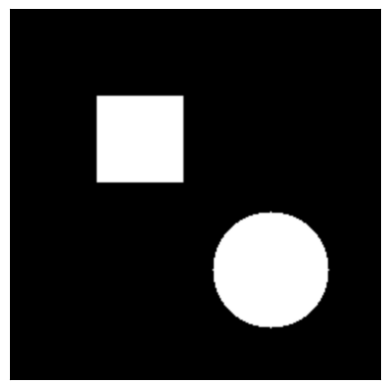

image type Grayscale: (256, 256)
height: 256
width: 256


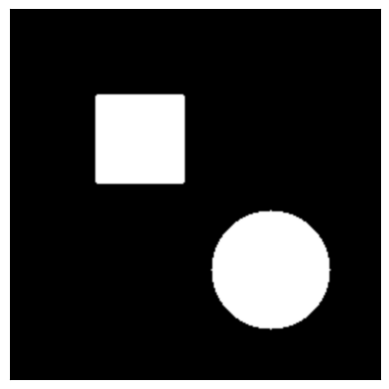

image type Grayscale: (256, 256)
height: 256
width: 256


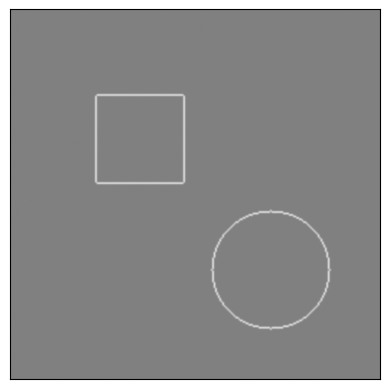

In [ ]:
show_image(binary_img)
dilatation_kernel = np.array([[0, 255, 0], [255, 0, 255], [0, 255, 0]])
dilatation_img = dilatation(binary_img, dilatation_kernel)
show_image(dilatation_img)
dilatation_diff = (128 + (dilatation_img - binary_img) / 2).astype(np.uint32)
show_image(dilatation_diff)